I'm working on this file **compsaa_file2_20220101_20220228.xlsx**

**This is the Gitlab [issue #2](https://gitlab.earlydata.com/devs/ai/rnd/ssv4-features/-/issues/2)**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
from datetime import datetime

**Read the X data**

In [158]:
x_data = pd.read_csv('/content/gdrive/MyDrive/EDMI/x.csv')
x_data1 = x_data
x_data1.head(5)

,sku,product_name,monthly_sales_qty,total_sales_qty,total_comment_num,date_key
0,68344574739,美可卓（Maxigenes）澳洲进口蓝胖子奶粉成人老年孕妇奶粉青少年学生儿童奶粉 全脂 5罐...,NaN,NaN,NaN,20220206
1,4712764,雀巢（nestle）能恩 较大婴儿配方奶粉 2段（6-12个月婴儿适用）400克,NaN,NaN,NaN,20220220
2,100031906240,沙漠白金骆驼奶粉新疆正宗无蔗糖益生菌纯骆驼奶中老年儿童青少年孕妇成人双峰驼乳粉单条装,NaN,NaN,NaN,20220123
3,10026385433422,英贝健 牛初乳益生菌骆驼 骆驼奶营养粉(2罐),NaN,NaN,NaN,20220214
4,31217400330,伊利 高蛋白高钙脱脂奶粉450g袋装 成人冲饮奶粉中老年营养奶 女士低脂早餐牛奶粉 独立小包装,NaN,NaN,NaN,20220109


In [159]:
x_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271097 entries, 0 to 271096
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sku                271097 non-null  int64  
 1   product_name       271097 non-null  object 
 2   monthly_sales_qty  0 non-null       float64
 3   total_sales_qty    0 non-null       float64
 4   total_comment_num  117854 non-null  float64
 5   date_key           271097 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 12.4+ MB


In [160]:
x_data1.shape

(271097, 6)

In [161]:
x_data.isnull().sum()

sku                       0
product_name              0
monthly_sales_qty    271097
total_sales_qty      271097
total_comment_num    153243
date_key                  0
dtype: int64

In [162]:

# Lets's Drop the NULL columns
x_data1 = x_data1.drop(['monthly_sales_qty', 'total_sales_qty'], axis = 1)
x_data1.tail()

,sku,product_name,total_comment_num,date_key
271092,1957784466,【福州仓发货】诺优能牛栏（Nutrilon）深度水解奶粉 深度水解PEPTI 1段 新版 低...,2000.0,20220216
271093,10032773438610,【新鲜日期】雀巢学生奶粉成年儿童中小学生营养牛奶粉冲饮6岁7以上早餐大学生 400g*4盒【...,NaN,20220206
271094,100007066678,京东超市 惠氏启赋（Wyeth illuma）亲和人体婴儿配方奶粉1段（0-6月适用） 35...,50000.0,20220123
271095,1231001,佳贝艾特（Kabrita）悦白幼儿配方奶粉 3段(1-3岁婴幼儿适用)150克（荷兰原装进口）,NaN,20220206
271096,62224578554,诺茵美 新疆奶源骆驼奶粉全脂中老年成人孕妇儿童学生新鲜营养富硒高钙高铁配方驼乳粉独立包装 富...,NaN,20220214


In [163]:
x_data1.dtypes

sku                    int64
product_name          object
total_comment_num    float64
date_key               int64
dtype: object

In [164]:
x_data1.sort_values(by = 'sku')
x_data1.head()

,sku,product_name,total_comment_num,date_key
0,68344574739,美可卓（Maxigenes）澳洲进口蓝胖子奶粉成人老年孕妇奶粉青少年学生儿童奶粉 全脂 5罐...,NaN,20220206
1,4712764,雀巢（nestle）能恩 较大婴儿配方奶粉 2段（6-12个月婴儿适用）400克,NaN,20220220
2,100031906240,沙漠白金骆驼奶粉新疆正宗无蔗糖益生菌纯骆驼奶中老年儿童青少年孕妇成人双峰驼乳粉单条装,NaN,20220123
3,10026385433422,英贝健 牛初乳益生菌骆驼 骆驼奶营养粉(2罐),NaN,20220214
4,31217400330,伊利 高蛋白高钙脱脂奶粉450g袋装 成人冲饮奶粉中老年营养奶 女士低脂早餐牛奶粉 独立小包装,NaN,20220109


In [165]:
x_data1['total_comment_num'].describe()

count    1.178540e+05
mean     4.497169e+03
std      3.605727e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+03
max      1.654155e+06
Name: total_comment_num, dtype: float64

In [166]:
x_data1['total_comment_num'].value_counts()

0.0         32321
200.0       11921
2000.0       8685
1000.0       8640
500.0        8609
            ...  
979.0           1
17008.0         1
703383.0        1
144357.0        1
3537.0          1
Name: total_comment_num, Length: 2245, dtype: int64

In [167]:
print(f'There are total', x_data['total_comment_num'].isnull().sum() , 'Null values in this dataset')

There are total 153243 Null values in this dataset


In [168]:
# Let's drop the rows where 'total_comment_num' is NULL/NaN/0
x_data1 = x_data1.dropna()
x_data1.shape

(117854, 4)

In [169]:
x_data1.head()

,sku,product_name,total_comment_num,date_key
9,19763015802,雀巢（Nestle） 怡养 中老年 成人高钙营养奶粉850g//克 成人高钙中老年人早餐冲饮...,1000.0,20220110
10,61067890457,（咨询享惊喜）合生元派星（原超级金装）婴幼儿配方奶粉2段800g（6-12月）法国原装进口 6罐,500.0,20220117
15,10036373314205,飞鹤奶粉成人 牧场经典1962加锌铁钙奶粉 儿童奶粉6岁以上高钙营养早餐奶粉 罐装900g ...,71.0,20220206
17,10032296953247,京东国际J仓配送美可卓蓝胖子奶粉 全脂高钙奶粉青少年人 成人老年儿童蓝妹子脱脂牛奶无蔗糖原装...,41.0,20220123
20,10042188217129,澳洲美可卓蓝胖子全脂牛奶粉1kg青少年学生中老年孕妇补钙早餐奶,0.0,20220117


In [170]:
#Let's Conver the date_key into date format
from datetime import datetime
x_data1['date_key'] = pd.to_datetime(x_data1['date_key'], format="%Y%m%d")
x_data1.head()

,sku,product_name,total_comment_num,date_key
9,19763015802,雀巢（Nestle） 怡养 中老年 成人高钙营养奶粉850g//克 成人高钙中老年人早餐冲饮...,1000.0,2022-01-10
10,61067890457,（咨询享惊喜）合生元派星（原超级金装）婴幼儿配方奶粉2段800g（6-12月）法国原装进口 6罐,500.0,2022-01-17
15,10036373314205,飞鹤奶粉成人 牧场经典1962加锌铁钙奶粉 儿童奶粉6岁以上高钙营养早餐奶粉 罐装900g ...,71.0,2022-02-06
17,10032296953247,京东国际J仓配送美可卓蓝胖子奶粉 全脂高钙奶粉青少年人 成人老年儿童蓝妹子脱脂牛奶无蔗糖原装...,41.0,2022-01-23
20,10042188217129,澳洲美可卓蓝胖子全脂牛奶粉1kg青少年学生中老年孕妇补钙早餐奶,0.0,2022-01-17


In [171]:
x_data1['total_comment_num'].describe()

count    1.178540e+05
mean     4.497169e+03
std      3.605727e+04
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+02
75%      1.000000e+03
max      1.654155e+06
Name: total_comment_num, dtype: float64

In [172]:
x_data1.dtypes

sku                           int64
product_name                 object
total_comment_num           float64
date_key             datetime64[ns]
dtype: object

In [173]:
len(x_data1['total_comment_num'])

117854

In [174]:
#Lets find any 0 in total_comment_num
(x_data1['total_comment_num']==0).sum()

32321

In [175]:
# Drop the values where 'total_comment_num' is 0
x_data1 = x_data1[x_data1['total_comment_num'] != 0]
x_data1.head()

,sku,product_name,total_comment_num,date_key
9,19763015802,雀巢（Nestle） 怡养 中老年 成人高钙营养奶粉850g//克 成人高钙中老年人早餐冲饮...,1000.0,2022-01-10
10,61067890457,（咨询享惊喜）合生元派星（原超级金装）婴幼儿配方奶粉2段800g（6-12月）法国原装进口 6罐,500.0,2022-01-17
15,10036373314205,飞鹤奶粉成人 牧场经典1962加锌铁钙奶粉 儿童奶粉6岁以上高钙营养早餐奶粉 罐装900g ...,71.0,2022-02-06
17,10032296953247,京东国际J仓配送美可卓蓝胖子奶粉 全脂高钙奶粉青少年人 成人老年儿童蓝妹子脱脂牛奶无蔗糖原装...,41.0,2022-01-23
23,14817152625,【次日达】伊利 金领冠900g//克婴儿配方奶粉伊利牛奶粉 儿童4段900g/克,1000.0,2022-02-06


In [176]:
x_data1.shape

(85533, 4)

In [177]:
x_data1['total_comment_num'].describe

<bound method NDFrame.describe of 9          1000.0
10          500.0
15           71.0
17           41.0
23         1000.0
           ...   
271087      100.0
271090      500.0
271091     2000.0
271092     2000.0
271094    50000.0
Name: total_comment_num, Length: 85533, dtype: float64>

In [150]:
# Lets sort the data by date
x_data1 = x_data1.sort_values(by = 'date_key')
x_data1.head()

,sku,product_name,total_comment_num,date_key
228019,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1155.0,2022-01-01
232818,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,532.0,2022-01-01
119223,46175092891,美赞臣蓝臻3段幼儿配方奶粉乳铁蛋白荷兰原装进口第二代 820g*6罐整箱装,3826.0,2022-01-01
174934,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1009.0,2022-01-01
174866,12099572956,【新客注册加送900g】飞鹤（FIRMUS）奶粉3段飞帆呵护幼儿配方牛奶粉三段900克,17066.0,2022-01-01


In [151]:
x_data1.tail()

,sku,product_name,total_comment_num,date_key
217095,10025655116165,Natur Top诺崔特 澳洲原装进口奶粉dha儿童小学生奶粉青少年早餐成长高钙牛奶粉罐装3...,68.0,2022-02-23
10056,51958996531,伊利 倍畅羊奶粉700g罐 羊奶粉成人 益生菌高钙高蛋白 纯羊乳 无添加蔗糖 中老年学生全家...,500.0,2022-02-23
28711,10037119891593,舒贝诺1段婴儿配方奶粉800克罐装 适合0-6月龄初生婴儿bn1 22年产新款,80.0,2022-02-23
71689,10026372910777,【整箱送礼品】君乐宝至臻3段奶粉幼儿配方牛奶粉三段400克 3段盒装400g,2000.0,2022-02-23
86370,10026628872854,【21年12月】雀巢怡运全家营养奶粉甜奶粉配方中老年成人320g克袋装女士儿童学生早餐冲饮牛...,43.0,2022-02-23


In [152]:
x_data1['date_key'].unique()

array(['2022-01-01T00:00:00.000000000', '2022-01-02T00:00:00.000000000',
       '2022-01-03T00:00:00.000000000', '2022-01-04T00:00:00.000000000',
       '2022-01-05T00:00:00.000000000', '2022-01-08T00:00:00.000000000',
       '2022-01-09T00:00:00.000000000', '2022-01-10T00:00:00.000000000',
       '2022-01-11T00:00:00.000000000', '2022-01-15T00:00:00.000000000',
       '2022-01-16T00:00:00.000000000', '2022-01-17T00:00:00.000000000',
       '2022-01-22T00:00:00.000000000', '2022-01-23T00:00:00.000000000',
       '2022-01-24T00:00:00.000000000', '2022-01-29T00:00:00.000000000',
       '2022-01-30T00:00:00.000000000', '2022-01-31T00:00:00.000000000',
       '2022-02-01T00:00:00.000000000', '2022-02-05T00:00:00.000000000',
       '2022-02-06T00:00:00.000000000', '2022-02-07T00:00:00.000000000',
       '2022-02-08T00:00:00.000000000', '2022-02-09T00:00:00.000000000',
       '2022-02-15T00:00:00.000000000', '2022-02-16T00:00:00.000000000',
       '2022-02-19T00:00:00.000000000', '2022-02-20

In [153]:
sku_uq = x_data1.sku.unique().tolist()
len(sku_uq)

20242

In [178]:
date_uq = x_data1.date_key.unique().tolist()
len(date_uq)

31

**For SKU 0**

In [184]:
# Import some necessary libraries 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

In [183]:
sku_df0 = x_data1.loc[(x_data1['sku'] == sku_uq[0])]
sku_df0.sort_values(by = 'date_key')

,sku,product_name,total_comment_num,date_key
228019,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1155.0,2022-01-01
75221,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1000.0,2022-01-16
60060,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1000.0,2022-01-23
250684,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1000.0,2022-01-30
257136,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1000.0,2022-02-16
206154,10029517213612,佳贝艾特kabrita羊奶粉试用装盒装体验装 悦白1段150g（限购1盒超出不发）,1000.0,2022-02-22


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


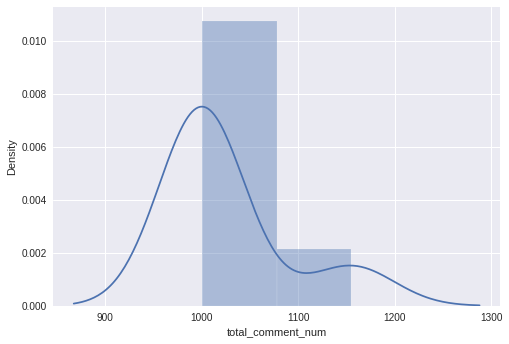

In [189]:
sns.distplot(sku_df0['total_comment_num'],kde= True)

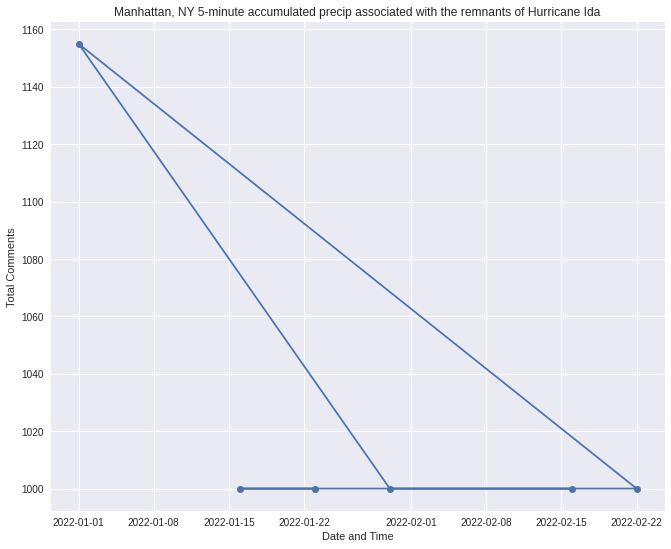

In [190]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel ('Date and Time')
ax.set_ylabel ('Total Comments')
ax.set_title ("Manhattan, NY 5-minute accumulated precip associated with the remnants of Hurricane Ida")
ax.plot(sku_df0['date_key'], sku_df0['total_comment_num'], marker='o')

**For SKU1**

In [200]:
sku_df1 = x_data1.loc[(x_data1['sku'] == sku_uq[1])]
sku_df1.sort_values(by = 'date_key')

,sku,product_name,total_comment_num,date_key
232818,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,532.0,2022-01-01
226544,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-01-04
244912,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-01-11
60512,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-01-17
77513,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-01-23
152208,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-01-30
57883,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-02-06
150105,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,500.0,2022-02-16
6268,100012814215,爱他美(Aptamil) 白金致亲中国香港版 婴儿配方奶粉1段（0-6个月） 900g 新西...,1000.0,2022-02-22


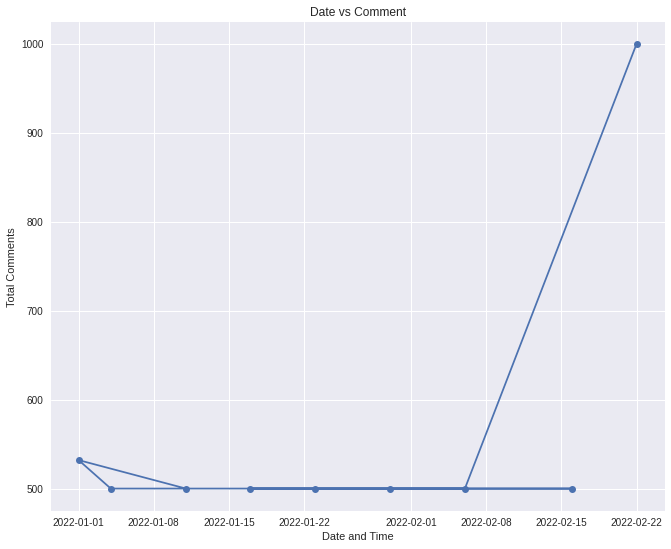

In [201]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel ('Date and Time')
ax.set_ylabel ('Total Comments')
ax.set_title ("Date vs Comment")
ax.plot(sku_df1['date_key'], sku_df1['total_comment_num'], marker='o')

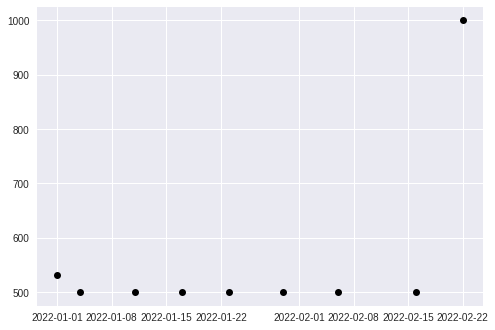

In [194]:
plt.plot(sku_df1['date_key'], sku_df1['total_comment_num'], 'o', color='black');

**SKU02**

In [196]:
sku_df2 = x_data1.loc[(x_data1['sku'] == sku_uq[2])]
sku_df2.sort_values(by = 'date_key')

,sku,product_name,total_comment_num,date_key
119223,46175092891,美赞臣蓝臻3段幼儿配方奶粉乳铁蛋白荷兰原装进口第二代 820g*6罐整箱装,3826.0,2022-01-01
130053,46175092891,美赞臣蓝臻3段幼儿配方奶粉乳铁蛋白荷兰原装进口第二代 820g*6罐整箱装,2000.0,2022-01-16
794,46175092891,美赞臣蓝臻3段幼儿配方奶粉乳铁蛋白荷兰原装进口第二代 820g*6罐整箱装,2000.0,2022-01-23


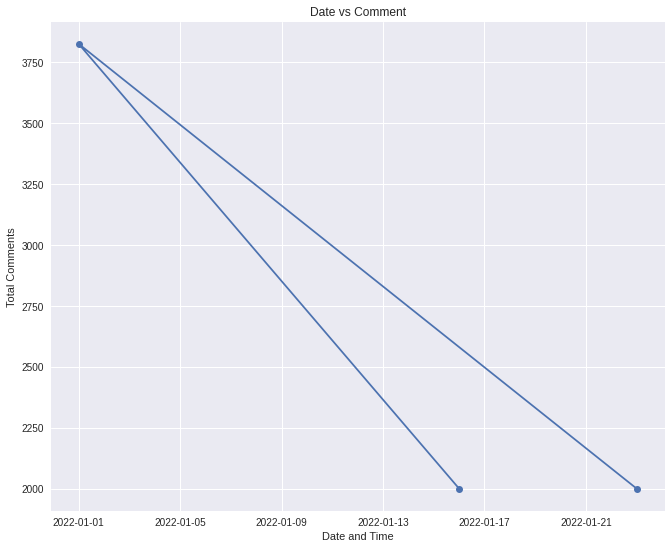

In [203]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel ('Date and Time')
ax.set_ylabel ('Total Comments')
ax.set_title ("Date vs Comment")
ax.plot(sku_df2['date_key'], sku_df2['total_comment_num'], marker='o')

**SKU03**

In [202]:
sku_df3 = x_data1.loc[(x_data1['sku'] == sku_uq[3])]
sku_df3.sort_values(by = 'date_key')

,sku,product_name,total_comment_num,date_key
174934,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1009.0,2022-01-01
74909,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1000.0,2022-01-17
15590,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1000.0,2022-01-24
252146,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1000.0,2022-01-30
78519,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1000.0,2022-02-07
256108,10386355720,【领券下单 现货速发】伊利金领冠奶粉珍护900克婴幼儿 儿童配方奶粉 3段900g*6罐【2...,1000.0,2022-02-16


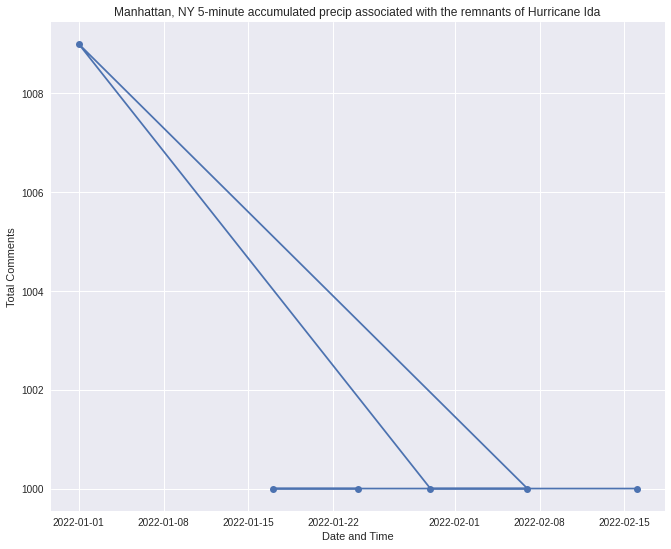

In [204]:
plt.style.use("seaborn")
fig = plt.figure(figsize=(11,9))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel ('Date and Time')
ax.set_ylabel ('Total Comments')
ax.set_title ("Manhattan, NY 5-minute accumulated precip associated with the remnants of Hurricane Ida")
ax.plot(sku_df3['date_key'], sku_df3['total_comment_num'], marker='o')